In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, normalize, PowerTransformer, MinMaxScaler, RobustScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error


import warnings

warnings.filterwarnings("ignore")

In [218]:
df = pd.read_csv(r'E:/INTERN/OIBSIP\Sales prediction\Advertising.csv')

In [219]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [221]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

<Axes: >

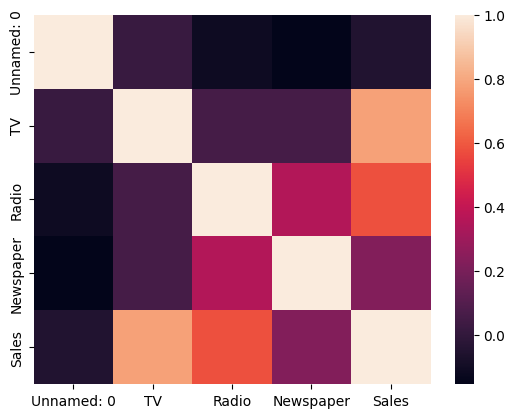

In [222]:
sns.heatmap(df.corr())

In [223]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<Axes: >

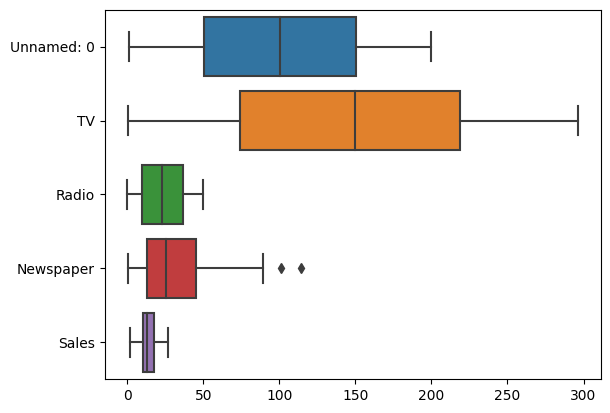

In [224]:
sns.boxplot(df , orient='h')

# so in newspaper there are little bit of outliers 

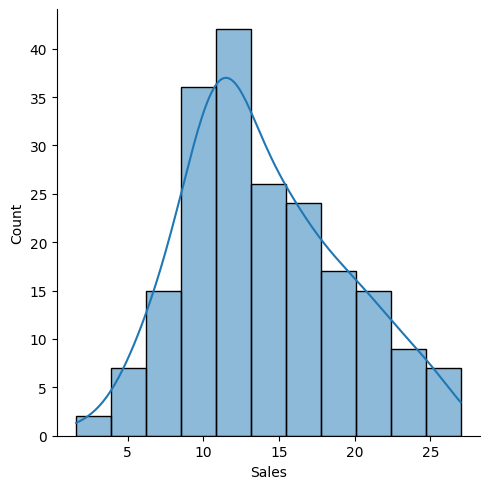

In [225]:
sns.displot(df, x='Sales', kde= True)

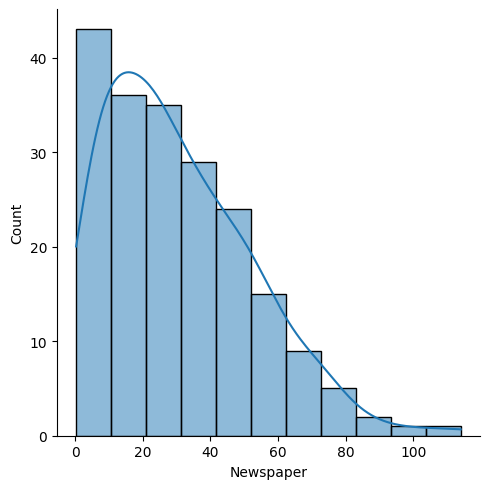

In [226]:
sns.displot(df, x='Newspaper', kde= True)

# little skewd data

# outliers clear

In [227]:
x = ["Newspaper"]
indexx = []
for i in x :
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)

    iqr = q2 - q1

    max = q2+(1.5*iqr)

    a = df[df[i]>max].index

    for i in a :
        indexx.append(i)



In [228]:
x1 = df.drop(index=indexx)

In [229]:
x1.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

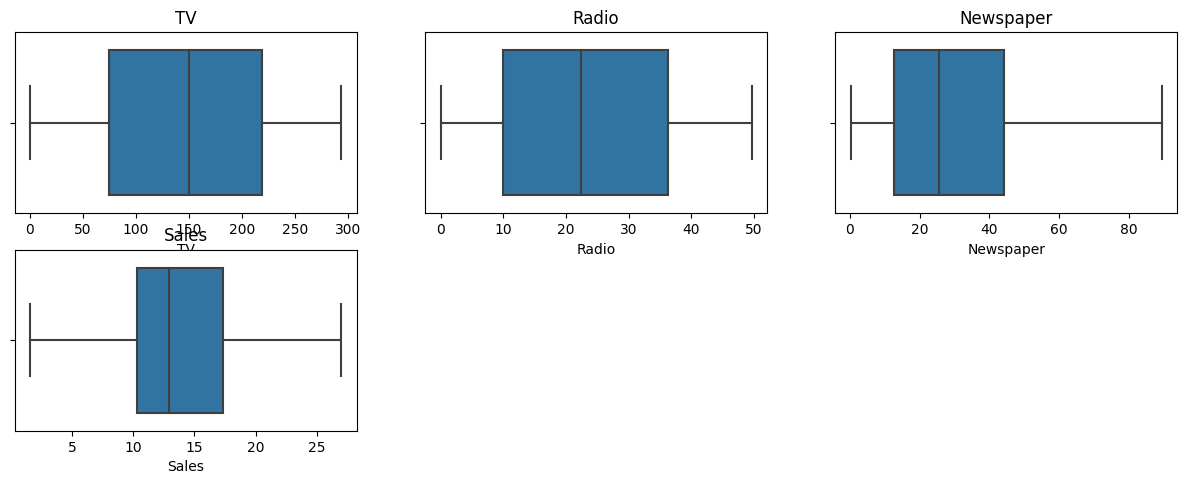

In [230]:
y = ['TV', 'Radio', 'Newspaper', 'Sales']

plt.figure(figsize=(15,8))
for i, j in enumerate(y):
    plt.subplot(3,3,i+1)
    sns.boxplot(x1 , x= j)
    plt.title(j)

# News paper is rightskewed 

<Axes: xlabel='Newspaper', ylabel='Density'>

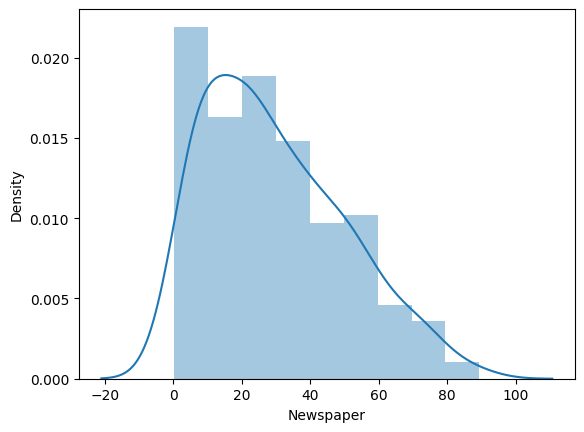

In [231]:
sns.distplot(x1['Newspaper'], kde=True)

In [232]:
x = x1.drop(columns=['Sales','Unnamed: 0'])
y = x1['Sales']

In [233]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [234]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=21)

In [235]:
sc = MinMaxScaler()
trans = FunctionTransformer(np.log1p)
sg = SGDRegressor(learning_rate='constant', max_iter=1000, eta0=0.01)

In [236]:

x_train[['Newspaper','Radio', 'TV']]= sc.fit_transform(x_train[['Newspaper','Radio', 'TV']])
x_test[['Newspaper','Radio', 'TV']]= sc.fit_transform(x_test[['Newspaper','Radio', 'TV']])

In [237]:
x_train[['Newspaper','Radio', 'TV']] = trans.fit_transform(x_train[['Newspaper','Radio', 'TV']])
x_test[['Newspaper','Radio', 'TV']] = trans.fit_transform(x_test[['Newspaper','Radio', 'TV']])

In [238]:
sg = SGDRegressor(learning_rate='constant', max_iter=1000, eta0=0.01)

In [239]:
sg.fit(x_train, y_train)

SGDRegressor(learning_rate='constant')

In [240]:
pred = sg.predict(x_test)

In [241]:
r2_score(y_test, pred)

0.9131790045850705

In [242]:
mean_absolute_error(y_test, pred)

1.2607697760156455

In [243]:
mean_squared_error(y_test, pred)

2.438466776864726

<Axes: xlabel='Sales', ylabel='Density'>

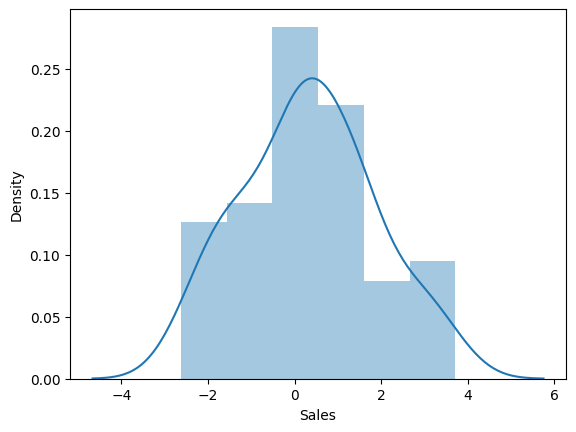

In [244]:
sns.distplot(y_test - pred)

In [245]:
pd.DataFrame({"test_data":y_test, "predicted_data":pred})

,test_data,predicted_data
145,10.3,9.552918
9,10.6,12.331176
18,11.3,10.027181
21,12.5,14.462113
46,10.6,8.881549
6,11.8,11.527717
53,21.2,19.773540
92,19.4,19.295197
131,12.7,14.885390
183,26.2,23.346591
